In [1]:
import textnets as tn

In [2]:
import pandas as pd
df = pd.read_csv("data/dataset-loslagos-8months.csv", 
                 sep=";", 
                 engine='python')
df.columns = ["date", "media_outlet", "url", "title", "text"]
df = df[:100]
print(len(df))

100


In [13]:
comunas = ["ancud", "castro", "chonchi", "curaco de vélez", "dalcahue", 
           "puqueldón", "queilén", "quemchi", "quellón", "quinchao"
           "calbuco", "cochamó", "fresia", "frutillar", "llanquihue"
           "los muermos", "maullin", "puerto montt", "puerto varas", "osorno"
           "puerto octay", "purranque", "puyehue", "rio negro", "san juan de la costa",
           "san pablo", "chaitén", "futaleufú", "hualaihué", "palena"]


from tqdm.notebook import tqdm_notebook

df['comuna'] = ""
for index, row in tqdm_notebook(df.iterrows(), desc="buscando comunas en content"):
    found = [comuna for comuna in comunas if(comuna in str(row["text"]).lower())]
    if(len(found)!= 0): df.at[index, 'comuna'] = str(found) 
        # OJOOOOO, TRANSFORME LA LISTA DE COMUNAS A STR
        # PORQUE EL LABEL QUE DEFINE AL NODO EN LA RED
        # NO PUEDE SER UN CONJUNTO DE DATOS
        
selection = ['ancud']
mask = df.comuna.apply(lambda x: any(item for item in selection if item in x))

df1 = df[mask]
df1.head()


buscando comunas en content: 0it [00:00, ?it/s]

,date,media_outlet,url,title,text,comuna
7,2021-10-01,seminariolocal,https://www.semanariolocal.cl/archivos/2207,Gremio médico rechaza cierre de camas críticas...,El Capítulo Médico Ancud y el Consejo Regional...,"['ancud', 'puerto montt']"
33,2021-10-01,laestrelladechiloe,https://www.laestrellachiloe.cl/impresa/2021/1...,Acercan atención de salud a los vecinos de Tri...,El corte de cinta de la Estación Médico Rural ...,"['ancud', 'quellón']"
34,2021-10-01,laestrelladechiloe,https://www.laestrellachiloe.cl/impresa/2021/1...,Puqueldón avanza a apertura en el fin del Esta...,"El avance de Puqueldón a la apertura inicial, ...","['ancud', 'castro', 'puqueldón', 'quellón']"
36,2021-10-01,laestrelladechiloe,https://www.laestrellachiloe.cl/impresa/2021/1...,Celebran Día de la Rabia con acciones preventivas,Una demostración de adiestramiento de mascotas...,"['ancud', 'quemchi']"
39,2021-10-01,laestrelladechiloe,https://www.laestrellachiloe.cl/impresa/2021/1...,denuncia y ayuda,no espere de más por atenciones en cesfam.- El...,"['ancud', 'castro', 'chonchi', 'dalcahue', 'qu..."


In [14]:
#!python -m spacy download es_core_news_md
!python -m spacy validate


| Loading compatibility table...
/ Loading compatibility table...
- Loading compatibility table...
\ Loading compatibility table...
[+] Loaded compatibility table

================= Installed pipeline packages (spaCy v3.3.0) =================
[i] spaCy installation:
C:\Users\56981\miniconda3\envs\grammar\lib\site-packages\spacy

NAME              SPACY                 VERSION      
en_core_web_sm    >=3.3.0.dev0,<3.4.0   3.3.0     [+]
es_core_news_md   >=3.3.0.dev0,<3.4.0   3.3.0     [+]



In [17]:
df1.set_index('comuna')
corpus = tn.Corpus.from_df(df1[['title']], doc_col="title", lang="es_core_news_md")

In [18]:
corpus

<Corpus with 10 documents using language model 'es_core_news_md'>

In [19]:
t = tn.Textnet(corpus.tokenized(), min_docs=1)

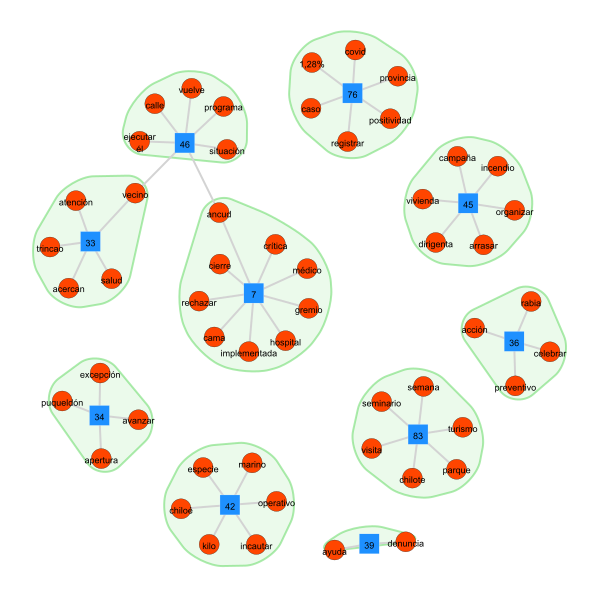

In [20]:
t.plot(label_nodes=True,
       show_clusters=True)

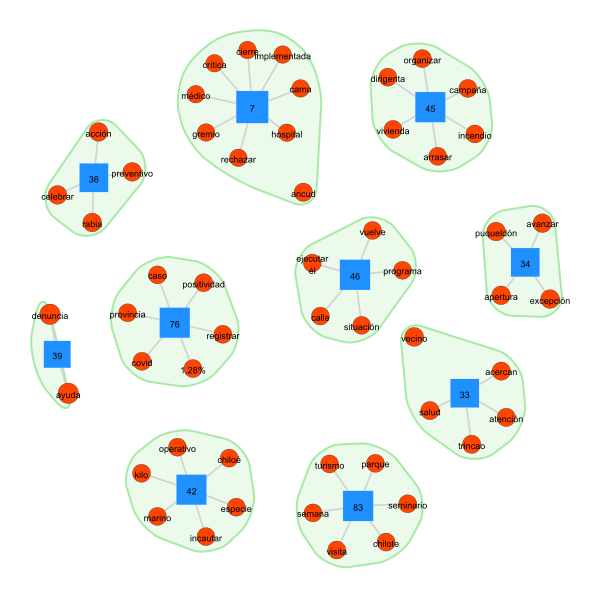

In [21]:
t.plot(label_nodes=True,
       show_clusters=True,
       scale_nodes_by="birank",
       scale_edges_by="weight")

https://textnets.readthedocs.io/en/stable/_modules/textnets/corpus.html

https://textnets.readthedocs.io/en/stable/index.html

https://textnets.readthedocs.io/en/stable/advanced.html
